In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def Scalexy(data, x0, x1, y0, y1):
  m = (y1 - y0)/(x1 - x0)
  b = y1 - m*x1
  y = m*data + b
  return y

In [ ]:
'''
Controlador neuronal para una planta de segundo orden
Planta: mass-spring-damper system
m (d/dt)^2 x+ b (d/dt) x + kx=u
'''

#initial conditions
e = 0
e1 = 0
e2 = 0
e3 = 0

y = 0
u = 0

s1 = 0
s2 = 0
s3 = 0


#Inicialización aleatoria de los pesos de la capa de entrada
w11 = np.random.random()
w12 = np.random.random()
w13 = np.random.random()
w21 = np.random.random()
w22 = np.random.random()
w23 = np.random.random()
w31 = np.random.random()
w32 = np.random.random()
w33 = np.random.random()

#Inicialización aleatoria de los pesos de la capa oculta
v1 = np.random.random()
v2 = np.random.random()
v3 = np.random.random()

#Términos para el factor de aprendizaje dinámico
alpha = 0.01
eta = 0.2


it = 0
lim = 1e5

#Set-Point
sp = 1

#Signo y parametros de la planta
signD = 1
x2=0
T,k,b,m=0.1,0.5,0.3,1
#Vectores auxiliares para graficar
tk = []
yk = []
spk = []
uk = []

while it < lim:
  #Cálculo de las sumatorias en las neuronas de entrada:
  s1=e1*w11+e2*w21+e3*w31
  s2=e1*w12+e2*w22+e3*w32
  s3=e1*w13+e2*w23+e3*w33

  #Cálculo de las salidas de las neuronas de entrada:9
  h1=1/(1+np.exp(-s1))
  h2=1/(1+np.exp(-s2))
  h3=1/(1+np.exp(-s3))

  #Cálculo de la sumatoria en la neurona de salida:
  r=h1*v1+h2*v2+h3*v3

  #Cálculo de la salida de la red
  u=1/(1+np.exp(-r))

  #Escalamiento de la señal de control, descomentar en caso necesario
  #u=Scalexy(u,0,1,-1,1)

  #Planta:
  y+=T*x2
  x2+=(T/m)*(-b*x2-k*y+u)

  #Cálculo del error del sistema
  e = sp - y

  #Se implementó un factor de aprendizaje dinámico.
  ra = eta #+ alpha*abs(e)

  delta1 = e*(u*(1-u))

  delta21=delta1*v1*(h1*(1-h1))
  delta22=delta1*v2*(h2*(1-h2))
  delta23=delta1*v3*(h3*(1-h3))

  #Ecuaciones de optimización para los pesos:
  v1 = v1 + ra*delta1*signD*h1
  v2 = v2 + ra*delta1*signD*h2
  v3 = v3 + ra*delta1*signD*h3

  w11 = w11 + ra*delta21*signD*e1
  w12 = w12 + ra*delta22*signD*e1
  w13 = w13 + ra*delta23*signD*e1

  w21 = w21 + ra*delta21*signD*e2
  w22 = w22 + ra*delta22*signD*e2
  w23 = w23 + ra*delta23*signD*e2

  w31 = w31 + ra*delta21*signD*e3
  w32 = w32 + ra*delta22*signD*e3
  w33 = w33 + ra*delta23*signD*e3


  if it%10 == 0:
    #print(sp, y, e)
    tk.append(it)
    yk.append(y)
    spk.append(sp)
    uk.append(u)



  e3 = e2
  e1 = e

  it += 1

  if it%(lim/4) == 0:
    sp = np.random.random()


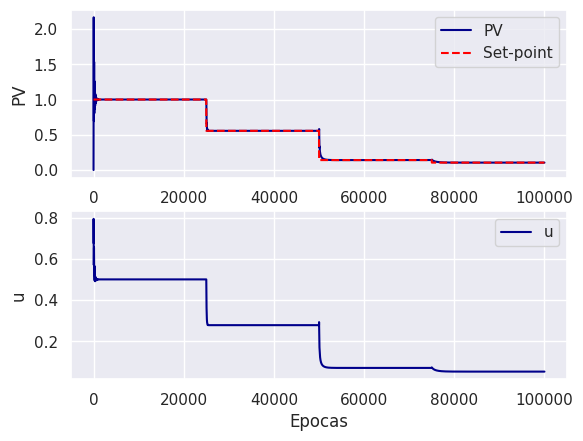

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(2)

axs[0].plot(tk,yk, label = "PV", c = "darkblue")
axs[0].plot(tk,spk, label = "Set-point", linestyle = "--", c = "red")

axs[0].set(xlabel='Epocas', ylabel='PV')
axs[0].legend()

axs[1].plot(tk,uk, label = "u", c = "darkblue")
axs[1].set(xlabel='Epocas', ylabel='u')
axs[1].legend()